# 1. Load libraries and data

### 1.1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### 1.2. Load data

In [3]:
data_import = pd.read_csv('W9 - ProjectData_2.csv')
data_import.head()

,station_id,station_code,station_name,latitude,longitude,month,day_of_week,holiday,malfunction_cause,malfunction_cause_group,duration_minutes,avg_temp,rain_mm,highest_mean_wind_speed,avg_relative_humidity,radiation,avg_visibility
0,8400244,GDM,Geldermalsen,51.883010,5.271270,1,Tuesday,True,damaged overhead wires,infrastructure,1.0,74.5,2,50,77,177,55.5
1,8400319,HT,'s-Hertogenbosch,51.690480,5.293620,1,Tuesday,True,damaged overhead wires,infrastructure,1.0,74.5,2,50,77,177,55.5
2,8400732,ZBM,Zaltbommel,51.808887,5.263333,1,Tuesday,True,damaged overhead wires,infrastructure,1.0,74.5,2,50,77,177,55.5
3,8400226,ALMO,Almere Oostvaarders,52.403332,5.300556,1,Tuesday,True,vandalism,external,162.0,74.5,2,50,77,177,55.5
4,8400394,LLS,Lelystad Centrum,52.507778,5.472778,1,Tuesday,True,vandalism,external,162.0,74.5,2,50,77,177,55.5


# 2. EDA

### 2.1. Data exploration

In [4]:
print("DATA SHAPE IS: ", data_import.shape)
print("")
print ("DATA DTYPES ARE: ") 
data_import.dtypes

DATA SHAPE IS:  (26665, 17)

DATA DTYPES ARE: 


station_id                   int64
station_code                object
station_name                object
latitude                   float64
longitude                  float64
month                        int64
day_of_week                 object
holiday                       bool
malfunction_cause           object
malfunction_cause_group     object
duration_minutes           float64
avg_temp                   float64
rain_mm                      int64
highest_mean_wind_speed      int64
avg_relative_humidity        int64
radiation                    int64
avg_visibility             float64
dtype: object

#### 2.1.1. Changing dtypes

In [5]:
data_import['duration_minutes'] = data_import['duration_minutes'].astype('int64')
data_import[['month', 'holiday']] = data_import[['month', 'holiday']].astype('object')

### 2.2. Checking for null values 
* there shouldn't be any, since this dataset was saved after cleaning.\

### 2.3. Checking unique values

In [6]:
for c in data_import[['holiday', 'duration_minutes', 'avg_temp', 'rain_mm',
       'highest_mean_wind_speed', 'avg_relative_humidity', 'radiation',
       'avg_visibility']]:
    print(c.upper())
    print(data_import[c].value_counts())
    print('-------------------------------------------------------------------------')

HOLIDAY
False    26217
True       448
Name: holiday, dtype: int64
-------------------------------------------------------------------------
DURATION_MINUTES
0        2078
5         465
6         443
3         410
4         406
13        398
2         364
1         343
10        342
12        340
14        324
8         293
9         286
11        283
16        278
7         269
25        261
35        257
36        233
19        230
17        221
27        218
33        209
38        206
15        202
28        198
30        196
18        196
24        195
45        194
32        193
26        188
20        187
59        184
42        179
23        178
40        178
44        175
34        172
37        172
54        171
31        161
29        159
46        156
43        156
86        151
72        151
21        150
41        146
22        145
49        143
70        142
51        140
39        140
66        137
55        134
52        132
53        132
56        131
76        129
50 

* This is interesting data to have, I will save this output as a dataframe for future 

* station_id, station_code and station_name contain the same information in different formats. Latitude and longitude in theory also offer the same information. For predictions, We will want to keep information about which station is affected by malfunctions: we already see that we can drop 4 columns.
* malfunction_cause is giving more detailed information than malfunction_cause_group. I will try 2 models, one with each option. I'm interested to see how I would get better predictions

### 2.4. Dropping columns

In [7]:
data_import.columns

Index(['station_id', 'station_code', 'station_name', 'latitude', 'longitude',
       'month', 'day_of_week', 'holiday', 'malfunction_cause',
       'malfunction_cause_group', 'duration_minutes', 'avg_temp', 'rain_mm',
       'highest_mean_wind_speed', 'avg_relative_humidity', 'radiation',
       'avg_visibility'],
      dtype='object')

In [8]:
data = data_import.drop(['station_id','station_name','latitude','longitude','malfunction_cause'], axis = 1)

### 2.5. Divide data into numerical and categorical

In [9]:
data.dtypes

station_code                object
month                       object
day_of_week                 object
holiday                     object
malfunction_cause_group     object
duration_minutes             int64
avg_temp                   float64
rain_mm                      int64
highest_mean_wind_speed      int64
avg_relative_humidity        int64
radiation                    int64
avg_visibility             float64
dtype: object

In [10]:
cat_df = data.select_dtypes(include=['object'])
num_df = data.select_dtypes(include=['int64', 'float64'])


In [11]:
cat_df.head()

,station_code,month,day_of_week,holiday,malfunction_cause_group
0,GDM,1,Tuesday,True,infrastructure
1,HT,1,Tuesday,True,infrastructure
2,ZBM,1,Tuesday,True,infrastructure
3,ALMO,1,Tuesday,True,external
4,LLS,1,Tuesday,True,external


In [12]:
num_df.head()

,duration_minutes,avg_temp,rain_mm,highest_mean_wind_speed,avg_relative_humidity,radiation,avg_visibility
0,1,74.5,2,50,77,177,55.5
1,1,74.5,2,50,77,177,55.5
2,1,74.5,2,50,77,177,55.5
3,162,74.5,2,50,77,177,55.5
4,162,74.5,2,50,77,177,55.5


### 2.6. Numerical Columns

#### 2.6.1. Getting basic statistical summary of the numerical columns

In [13]:
num_df.describe()

,duration_minutes,avg_temp,rain_mm,highest_mean_wind_speed,avg_relative_humidity,radiation,avg_visibility
count,26665.000000,26665.000000,26665.000000,26665.000000,26665.000000,26665.000000,26665.000000
mean,112.877292,110.743690,11.249016,51.199700,78.466342,1067.422501,58.929796
std,338.752809,64.935056,25.836041,17.512288,10.620828,824.052931,13.144768
min,0.000000,-20.000000,-1.000000,20.000000,42.000000,31.000000,20.000000
25%,13.000000,63.000000,0.000000,40.000000,73.000000,347.000000,46.000000
50%,48.000000,104.000000,1.000000,50.000000,80.000000,887.000000,62.500000
75%,126.000000,156.000000,13.000000,60.000000,87.000000,1733.000000,70.500000
max,17011.000000,297.500000,247.000000,110.000000,97.000000,3036.000000,79.000000


In [14]:
num_df.skew(axis = 0, skipna = True) 

duration_minutes           28.743380
avg_temp                    0.450927
rain_mm                     5.155684
highest_mean_wind_speed     0.686947
avg_relative_humidity      -0.739682
radiation                   0.605127
avg_visibility             -0.436034
dtype: float64

#### 2.6.2. Checking correlations

In [15]:
num_df.corr()

,duration_minutes,avg_temp,rain_mm,highest_mean_wind_speed,avg_relative_humidity,radiation,avg_visibility
duration_minutes,1.000000,0.102766,0.008809,-0.005030,-0.048051,0.063357,0.006756
avg_temp,0.102766,1.000000,0.125954,-0.039702,-0.580091,0.699278,0.288481
rain_mm,0.008809,0.125954,1.000000,0.206660,0.159021,-0.083604,-0.016182
highest_mean_wind_speed,-0.005030,-0.039702,0.206660,1.000000,-0.057741,-0.191759,0.301247
avg_relative_humidity,-0.048051,-0.580091,0.159021,-0.057741,1.000000,-0.805277,-0.558510
radiation,0.063357,0.699278,-0.083604,-0.191759,-0.805277,1.000000,0.319790
avg_visibility,0.006756,0.288481,-0.016182,0.301247,-0.558510,0.319790,1.000000


#### 2.6.3. Checking distributions

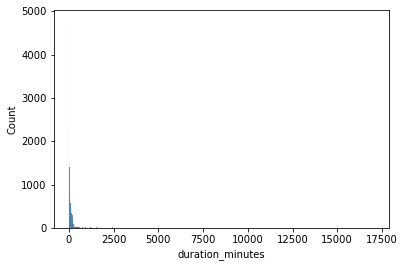

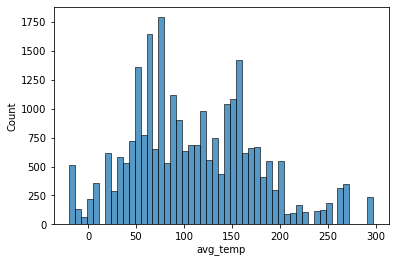

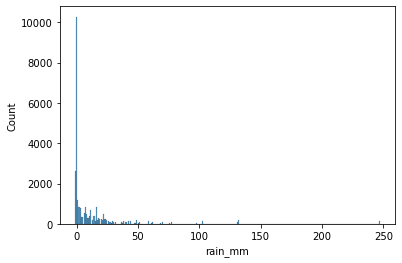

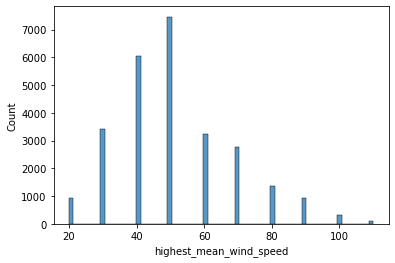

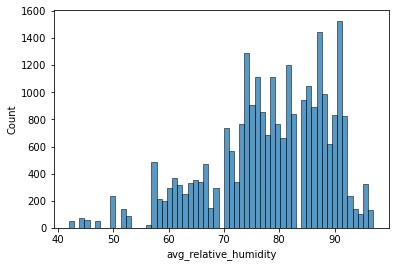

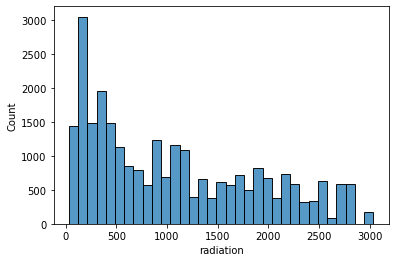

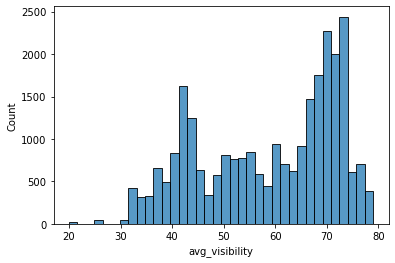

In [16]:
for i in num_df.columns:
    sns.histplot(num_df[i])
    plt.show()

# LOG

In [17]:
def log_transform(x):
    if np.isfinite(x) and x!=0: 
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [18]:
duration = pd.DataFrame(num_df['duration_minutes'])

In [19]:
duration.head()

,duration_minutes
0,1
1,1
2,1
3,162
4,162


In [20]:
log = duration.applymap(log_transform)
log.head()

,duration_minutes
0,0.000000
1,0.000000
2,0.000000
3,5.087596
4,5.087596


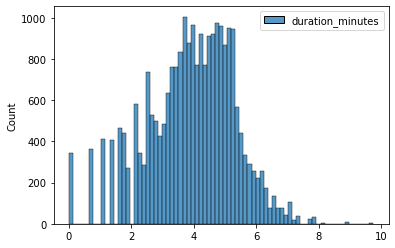

In [21]:
sns.histplot(log)
plt.show()

In [22]:
num = num_df.drop(['duration_minutes'],axis = 1)

In [23]:
num_data = pd.concat([log,num], axis = 1)

In [24]:
#def log_transform(x):
#    if np.isfinite(x) and x!=0: 
#        return np.log(x)
#    else:
#        return np.NAN # We are returning NaNs so that we can replace them later

In [25]:
#num_log = num_df.applymap(log_transform)
#num_log.head()

#### 2.6.4. Checking outliers

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


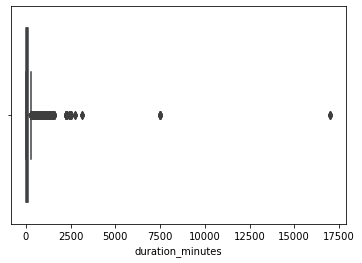

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


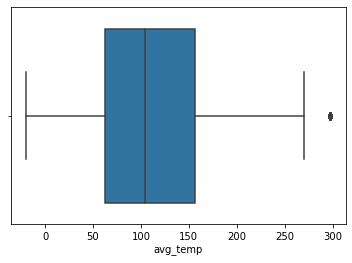

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


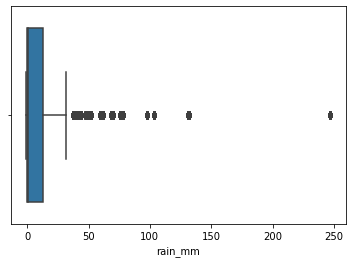

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


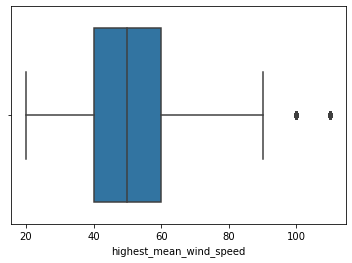

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


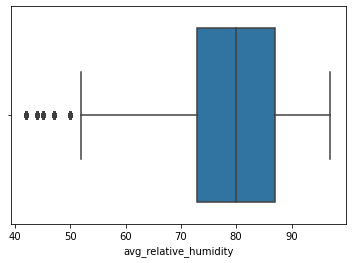

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


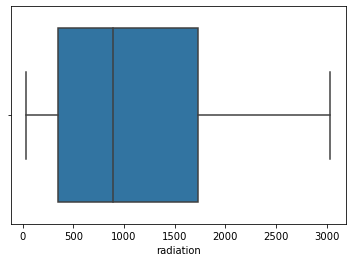

C:\Users\yelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


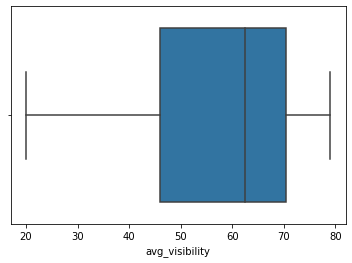

In [26]:
for i in num_df.columns:
    sns.boxplot(num_df[i])
    plt.show()

In [27]:
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

In [28]:
((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).sum()

duration_minutes           1925
avg_temp                    233
rain_mm                    2277
highest_mean_wind_speed     427
avg_relative_humidity       463
radiation                     0
avg_visibility                0
dtype: int64

In [29]:
outlier_df = num_df.drop(['radiation', 'avg_visibility'], axis=1)

In [30]:
for col in outlier_df.columns:
    iqr = np.percentile(outlier_df[col],75) - np.percentile(outlier_df[col],25)
    upper_limit = np.percentile(outlier_df[col],75) + 1.5*iqr
    lower_limit = np.percentile(outlier_df[col],75) - 1.5*iqr
    print("For column {}:".format(col))
    print("the upper wisker is at: %4.2f" % upper_limit)
    print("the lower wisker is at: %4.2f" % lower_limit)
    outliers_upper = outlier_df[outlier_df[col] > upper_limit].index.tolist()
    outliers_lower = outlier_df[outlier_df[col] < lower_limit].index.tolist()
    print("the number of points outise the upper wisker is: ",len(outliers_upper))
    print("the number of points outise the lower wisker is: ",len(outliers_lower))

For column duration_minutes:
the upper wisker is at: 295.50
the lower wisker is at: -43.50
the number of points outise the upper wisker is:  1925
the number of points outise the lower wisker is:  0
For column avg_temp:
the upper wisker is at: 295.50
the lower wisker is at: 16.50
the number of points outise the upper wisker is:  233
the number of points outise the lower wisker is:  1294
For column rain_mm:
the upper wisker is at: 32.50
the lower wisker is at: -6.50
the number of points outise the upper wisker is:  2277
the number of points outise the lower wisker is:  0
For column highest_mean_wind_speed:
the upper wisker is at: 90.00
the lower wisker is at: 30.00
the number of points outise the upper wisker is:  427
the number of points outise the lower wisker is:  950
For column avg_relative_humidity:
the upper wisker is at: 108.00
the lower wisker is at: 66.00
the number of points outise the upper wisker is:  0
the number of points outise the lower wisker is:  3515


* Although dropping outliers is risky business (e.g. house prices - the model would not be able to predict outlier prices), in this specific case, it makes sense to drop the outliers from duration_minutes.
* For this specific problem we are trying to predict the time it will take for a malfunction to be resolved. That means that the user will have been castaway presently. The value of a duration above 24h (exaggerating) makes no sense, since this will have probably been reported already 
* When the value of duration_minutes is 295.50 (5h) we can assume that such a prediction will already allow a user to make the decision to search for an alternative means of transport.

### 2.7. Categorical Columns

#### 2.7.1. Get Dummies

In [31]:
dummy_data = pd.get_dummies(cat_df,drop_first=True)
dummy_data.head()

,station_code_AH,station_code_AHP,station_code_AHPR,station_code_AHZ,station_code_AKL,station_code_AKM,station_code_ALM,station_code_ALMB,station_code_ALMM,station_code_ALMO,station_code_ALMP,station_code_AMF,station_code_AMFS,station_code_AML,station_code_AMPO,station_code_AMR,station_code_AMRI,station_code_AMRN,station_code_ANA,station_code_ANDD,station_code_APD,station_code_APDM,station_code_APDO,station_code_APG,station_code_APN,station_code_ARN,station_code_ASA,station_code_ASB,station_code_ASD,station_code_ASDL,station_code_ASDM,station_code_ASDZ,station_code_ASHD,station_code_ASN,station_code_ASS,station_code_ASSP,station_code_ATN,station_code_ATW,station_code_ATWLB,station_code_AVAT,station_code_BD,station_code_BDE,station_code_BDG,station_code_BDM,station_code_BDPB,station_code_BERCH,station_code_BET,station_code_BF,station_code_BGN,station_code_BH,station_code_BHDV,station_code_BHV,station_code_BIELEF,station_code_BK,station_code_BKF,station_code_BKG,station_code_BKL,station_code_BL,station_code_BLL,station_code_BMN,station_code_BMR,station_code_BN,station_code_BNC,station_code_BNK,station_code_BNN,station_code_BNZ,station_code_BP,station_code_BR,station_code_BRD,station_code_BRESSX,station_code_BRN,station_code_BRUSC,station_code_BRUSN,station_code_BRUSZ,station_code_BSD,station_code_BSK,station_code_BSKS,station_code_BSMZ,station_code_BTL,station_code_BUENDE,station_code_BV,station_code_BZL,station_code_CAS,station_code_CK,station_code_CL,station_code_CO,station_code_CPS,station_code_CVM,station_code_DA,station_code_DB,station_code_DDN,station_code_DDR,station_code_DDRS,station_code_DDZD,station_code_DEI,station_code_DID,station_code_DL,station_code_DLD,station_code_DLN,station_code_DMN,station_code_DMNZ,station_code_DN,station_code_DR,station_code_DRH,station_code_DRON,station_code_DRP,station_code_DT,station_code_DTC,station_code_DTCH,station_code_DTCP,station_code_DUISB,station_code_DUSSEL,station_code_DV,station_code_DVC,station_code_DVD,station_code_DVN,station_code_DVNK,station_code_DWE,station_code_DZ,station_code_DZW,station_code_EC,station_code_ED,station_code_EDC,station_code_EDN,station_code_EEM,station_code_EGH,station_code_EGHM,station_code_EHS,station_code_EHV,station_code_EKZ,station_code_EM,station_code_EML,station_code_EMN,station_code_EMNZ,station_code_ES,station_code_ESE,station_code_ESK,station_code_ESN,station_code_EST,station_code_ETN,station_code_FBNL,station_code_FKTH,station_code_FN,station_code_FVS,station_code_FWD,station_code_G,station_code_GBG,station_code_GBR,station_code_GD,station_code_GDG,station_code_GDM,station_code_GDR,station_code_GERP,station_code_GK,station_code_GKT,station_code_GLN,station_code_GN,station_code_GND,station_code_GNN,station_code_GO,station_code_GP,station_code_GR,station_code_GS,station_code_GV,station_code_GVC,station_code_GVM,station_code_GVMW,station_code_GW,station_code_GWD,station_code_GZ,station_code_HAD,station_code_HB,station_code_HBZM,station_code_HD,station_code_HDB,station_code_HDE,station_code_HDG,station_code_HDR,station_code_HDRZ,station_code_HFD,station_code_HGL,station_code_HGLG,station_code_HGLO,station_code_HGV,station_code_HGZ,station_code_HIL,station_code_HK,station_code_HKS,station_code_HLG,station_code_HLGH,station_code_HLM,station_code_HLMS,station_code_HLO,station_code_HM,station_code_HMBH,station_code_HMBV,station_code_HMH,station_code_HMN,station_code_HN,station_code_HNK,station_code_HNO,station_code_HNP,station_code_HON,station_code_HOR,station_code_HR,station_code_HRL,station_code_HRLW,station_code_HRN,station_code_HRT,station_code_HRY,station_code_HT,station_code_HTN,station_code_HTNC,station_code_HTO,station_code_HVL,station_code_HVS,station_code_HVSM,station_code_HVSP,station_code_HWD,station_code_HWZB,station_code_HZ,station_code_HZE,station_code_IJT,station_code_KBD,station_code_KBK,station_code_KBOI,station_code_KBRY,station_code_KDFFH,station_code_KDUL,station_code_KKD,station_code_KLP,station_code_KMA,station_code_KMR,station

### 2.8. Concatenating numerical and categorical data

In [32]:
data_concat = pd.concat([num_data,dummy_data], axis=1)
data_concat.head()

,duration_minutes,avg_temp,rain_mm,highest_mean_wind_speed,avg_relative_humidity,radiation,avg_visibility,station_code_AH,station_code_AHP,station_code_AHPR,station_code_AHZ,station_code_AKL,station_code_AKM,station_code_ALM,station_code_ALMB,station_code_ALMM,station_code_ALMO,station_code_ALMP,station_code_AMF,station_code_AMFS,station_code_AML,station_code_AMPO,station_code_AMR,station_code_AMRI,station_code_AMRN,station_code_ANA,station_code_ANDD,station_code_APD,station_code_APDM,station_code_APDO,station_code_APG,station_code_APN,station_code_ARN,station_code_ASA,station_code_ASB,station_code_ASD,station_code_ASDL,station_code_ASDM,station_code_ASDZ,station_code_ASHD,station_code_ASN,station_code_ASS,station_code_ASSP,station_code_ATN,station_code_ATW,station_code_ATWLB,station_code_AVAT,station_code_BD,station_code_BDE,station_code_BDG,station_code_BDM,station_code_BDPB,station_code_BERCH,station_code_BET,station_code_BF,station_code_BGN,station_code_BH,station_code_BHDV,station_code_BHV,station_code_BIELEF,station_code_BK,station_code_BKF,station_code_BKG,station_code_BKL,station_code_BL,station_code_BLL,station_code_BMN,station_code_BMR,station_code_BN,station_code_BNC,station_code_BNK,station_code_BNN,station_code_BNZ,station_code_BP,station_code_BR,station_code_BRD,station_code_BRESSX,station_code_BRN,station_code_BRUSC,station_code_BRUSN,station_code_BRUSZ,station_code_BSD,station_code_BSK,station_code_BSKS,station_code_BSMZ,station_code_BTL,station_code_BUENDE,station_code_BV,station_code_BZL,station_code_CAS,station_code_CK,station_code_CL,station_code_CO,station_code_CPS,station_code_CVM,station_code_DA,station_code_DB,station_code_DDN,station_code_DDR,station_code_DDRS,station_code_DDZD,station_code_DEI,station_code_DID,station_code_DL,station_code_DLD,station_code_DLN,station_code_DMN,station_code_DMNZ,station_code_DN,station_code_DR,station_code_DRH,station_code_DRON,station_code_DRP,station_code_DT,station_code_DTC,station_code_DTCH,station_code_DTCP,station_code_DUISB,station_code_DUSSEL,station_code_DV,station_code_DVC,station_code_DVD,station_code_DVN,station_code_DVNK,station_code_DWE,station_code_DZ,station_code_DZW,station_code_EC,station_code_ED,station_code_EDC,station_code_EDN,station_code_EEM,station_code_EGH,station_code_EGHM,station_code_EHS,station_code_EHV,station_code_EKZ,station_code_EM,station_code_EML,station_code_EMN,station_code_EMNZ,station_code_ES,station_code_ESE,station_code_ESK,station_code_ESN,station_code_EST,station_code_ETN,station_code_FBNL,station_code_FKTH,station_code_FN,station_code_FVS,station_code_FWD,station_code_G,station_code_GBG,station_code_GBR,station_code_GD,station_code_GDG,station_code_GDM,station_code_GDR,station_code_GERP,station_code_GK,station_code_GKT,station_code_GLN,station_code_GN,station_code_GND,station_code_GNN,station_code_GO,station_code_GP,station_code_GR,station_code_GS,station_code_GV,station_code_GVC,station_code_GVM,station_code_GVMW,station_code_GW,station_code_GWD,station_code_GZ,station_code_HAD,station_code_HB,station_code_HBZM,station_code_HD,station_code_HDB,station_code_HDE,station_code_HDG,station_code_HDR,station_code_HDRZ,station_code_HFD,station_code_HGL,station_code_HGLG,station_code_HGLO,station_code_HGV,station_code_HGZ,station_code_HIL,station_code_HK,station_code_HKS,station_code_HLG,station_code_HLGH,station_code_HLM,station_code_HLMS,station_code_HLO,station_code_HM,station_code_HMBH,station_code_HMBV,station_code_HMH,station_code_HMN,station_code_HN,station_code_HNK,station_code_HNO,station_code_HNP,station_code_HON,station_code_HOR,station_code_HR,station_code_HRL,station_code_HRLW,station_code_HRN,station_code_HRT,station_code_HRY,station_code_HT,station_code_HTN,station_code_HTNC,station_code_HTO,station_code_HVL,station_code_HVS,station_code_HVSM,station_code_HVSP,station_code_HWD,station_code_HWZB,station_code_HZ,station_code_HZE,station_code_IJT,station_code_KBD,station_code_KBK,station_code_KBOI,station_code_KBRY,station

In [33]:
data_concat = data_concat.dropna()

### 2.9. Divide data into dependent and independent variables

In [34]:
y = data_concat[['duration_minutes']]
X = data_concat.drop(['duration_minutes'], axis=1)

In [35]:
y.shape

(24587, 1)

In [36]:
X.shape

(24587, 474)

# 3. Model

### 3.1. Importing libraries

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

### 3.2. Train-Test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### 3.3. Scaling training data

In [39]:
#transformer = StandardScaler().fit(X_train)
#x_standarized = transformer.transform(X_train)
#x_standarized = pd.DataFrame(x_standarized)

### Model 1

In [41]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train, y_train)

In [42]:
lm_predictions = lm_model.predict(X_test)

In [43]:
lm_predictions_exp = np.exp(lm_predictions)
y_test_exp = np.exp(y_test)

In [45]:
MAE = mean_absolute_error(y_test_exp,lm_predictions_exp)
MSE = mean_squared_error(y_test_exp,lm_predictions_exp)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test_exp,lm_predictions_exp)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:  93.09
The mean squared error of the model in the test set is: 182944.34
The root mean squared error of the model in the test set is: 427.72
The R2 of the model in the test set is: -0.01


### Model 2

In [ ]:
kn = KNeighborsRegressor(n_neighbors=3)
kn_model = kn.fit(x_standarized, y_train)

In [ ]:
kn_predictions = kn_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,kn_predictions)
MSE = mean_squared_error(y_test,kn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,kn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

### Model 3

In [ ]:
dtr = DecisionTreeRegressor()
dtr_model = dtr.fit(x_standarized, y_train)

In [ ]:
dtr_predictions = dtr_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,dtr_predictions)
MSE = mean_squared_error(y_test,dtr_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,dtr_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))